In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_ml_features.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859554,1.709161,129.0,2019
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019


In [5]:
X = df.drop(columns=['PRICE'],axis =1).values
y = df['PRICE'].values

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X[0:1]

array([[-0.42965461, -0.89997173,  0.23589087, -0.15445854, -0.61014886,
         1.09933878,  0.78468341,  0.60007618, -1.45556355, -0.04377577,
         2.08739396,  1.39948038,  0.68016718]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [9]:
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size:', X_test.shape,  y_test.shape)

Train set size: (15330, 13) (15330,)
Test set size: (3833, 13) (3833,)


In [10]:
cv = RepeatedKFold(n_repeats=2, random_state=100)

In [11]:
param_grid_ann = [{'hidden_layer_sizes':[10, 100],
                   'activation':['identity', 'logistic', 'tanh', 'relu'], 
                   'solver':['lbfgs', 'sgd', 'adam']}]
ann = MLPRegressor()
ann_cv = GridSearchCV(ann, param_grid_ann, cv = cv)
ann_cv.fit(X_train,y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=100),
             estimator=MLPRegressor(),
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [10, 100],
                          'solver': ['lbfgs', 'sgd', 'adam']}])

In [12]:
print("tuned hpyerparameters :(best parameters) ",ann_cv.best_params_)
print("accuracy :",ann_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}
accuracy : 0.8332854302072


In [13]:
yhat_ann=ann_cv.predict(X_test)

In [14]:
mse_ann = mean_squared_error(y_test, yhat_ann)
r2_ann = r2_score(y_test, yhat_ann)
print("Mean squared error: %.2f" % mse_ann)
print("Coefficient of determination: %.2f" % r2_ann)

Mean squared error: 0.04
Coefficient of determination: 0.84


In [15]:
param_grid_svr = {'C': np.logspace(-3, 3, 5),
                 'loss' :['epsilon_insensitive', 'squared_epsilon_insensitive']}
svr = LinearSVR(random_state=0, tol=1e-5)

In [16]:
svr_cv = GridSearchCV(svr, param_grid_svr, cv = cv)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=100),
             estimator=LinearSVR(random_state=0, tol=1e-05),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']})

In [17]:
print("tuned hpyerparameters :(best parameters) ",svr_cv.best_params_)
print("accuracy :",svr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'loss': 'squared_epsilon_insensitive'}
accuracy : 0.7774989566397901


In [18]:
yhat_svr = svr_cv.predict(X_test)

In [19]:
mse_svr = mean_squared_error(y_test, yhat_svr)
r2_svr = r2_score(y_test, yhat_svr)
print("Mean squared error: %.2f" % mse_svr)
print("Coefficient of determination: %.2f" % r2_svr)

Mean squared error: 0.05
Coefficient of determination: 0.79


In [20]:
param_grid_dt = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeRegressor()

In [21]:
tree_cv = GridSearchCV(tree, param_grid_dt, cv = cv)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=100),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7909297237015738


In [23]:
yhat_dt = tree_cv.predict(X_test)

In [24]:
mse_dt = mean_squared_error(y_test, yhat_dt)
r2_dt = r2_score(y_test, yhat_dt)
print("Mean squared error: %.2f" % mse_dt)
print("Coefficient of determination: %.2f" % r2_dt)

Mean squared error: 0.05
Coefficient of determination: 0.80


In [25]:
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsRegressor()

In [26]:
knn_cv = GridSearchCV(KNN, param_grid_knn, cv = cv)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=100),
             estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [27]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.8217885312752277


In [28]:
yhat_knn = knn_cv.predict(X_test)

In [29]:
mse_knn = mean_squared_error(y_test, yhat_knn)
r2_knn = r2_score(y_test, yhat_knn)
print("Mean squared error: %.2f" % mse_knn)
print("Coefficient of determination: %.2f" % r2_knn)

Mean squared error: 0.05
Coefficient of determination: 0.82


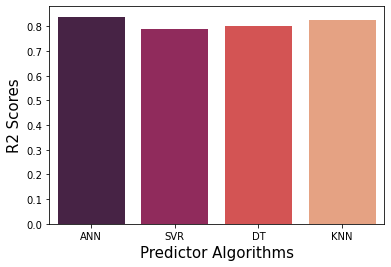

In [30]:
scores = {'ANN':r2_ann, 'SVR':r2_svr, 'DT':r2_dt, 'KNN':r2_knn}

import seaborn as sns

keys = list(scores.keys())
values = list(scores.values())
sns.barplot(x=keys, y=values, palette="rocket")

plt.xlabel('Predictor Algorithms', fontsize = 15)
plt.ylabel('R2 Scores', fontsize = 15)
plt.show()

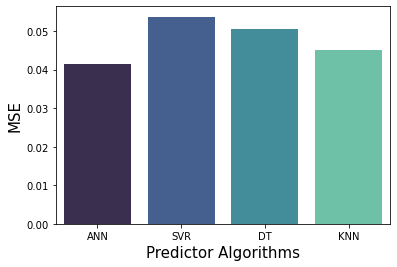

In [31]:
grid_scores = {'ANN':mse_ann, 'SVR':mse_svr, 'DT':mse_dt, 'KNN':mse_knn}

keys = list(grid_scores.keys())
values = list(grid_scores.values())
sns.barplot(x=keys, y=values, palette="mako")

plt.xlabel('Predictor Algorithms', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()

| Date (YYYY-MM-DD) | Changed By    | 
| ----------------- | ------------- | 
| 2021-12-10        | Leila F F     | 
| 2021-12-10        | Alex R        | 